In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\pedro\OneDrive\Desktop\DSProject Folder\src\Financial Data 14-18\Int DFs\df_all1_KNN.csv")

In [4]:
df

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Following Year Price Variation [%],Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.01870,-0.0217,0.03590,0.0316,0.12280,0.0000,-0.1746,Consumer Defensive,-9.323276,0.0
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,0.06538,0.0459,0.11656,-0.0653,0.22288,1.6484,1.7313,Consumer Defensive,-25.512193,0.0
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.06180,0.0981,0.18860,0.3268,0.27380,0.0000,0.0234,Consumer Defensive,33.118297,1.0
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,0.02110,-0.0510,-0.01890,0.1963,-0.04580,0.0000,-0.0060,Consumer Defensive,2.752291,1.0
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.02570,0.0090,0.02150,0.0274,0.10250,0.0000,-0.0220,Consumer Defensive,12.897715,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22072,YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0.00000,0.0000,-0.05080,-0.1409,-0.01520,0.0000,-0.2602,Real Estate,-90.962099,0.0
22073,YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0.34450,0.0000,-0.23230,-0.8602,0.00000,0.0352,-0.0993,Basic Materials,-77.922077,0.0
22074,ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0.16050,0.7706,0.24890,0.4074,-0.09680,0.2415,0.8987,Basic Materials,-17.834400,0.0
22075,ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,...,0.89800,0.0000,0.15680,-0.2200,0.00000,2.7499,0.1457,Industrials,-73.520000,0.0


In [6]:
df.select_dtypes(include='object').columns

Index(['Unnamed: 0', 'Sector'], dtype='object')

In [10]:
df['Class'].value_counts()

Class
1.0    12159
0.0     9918
Name: count, dtype: int64

In [12]:
df['Class'].value_counts()/len(df)*100

Class
1.0    55.075418
0.0    44.924582
Name: count, dtype: float64

Dataset relatively balanced

In [11]:
df['Sector'].value_counts()

Sector
Financial Services        4720
Healthcare                3305
Technology                3126
Industrials               2768
Consumer Cyclical         2471
Basic Materials           1344
Real Estate               1241
Energy                    1217
Consumer Defensive         922
Utilities                  518
Communication Services     445
Name: count, dtype: int64

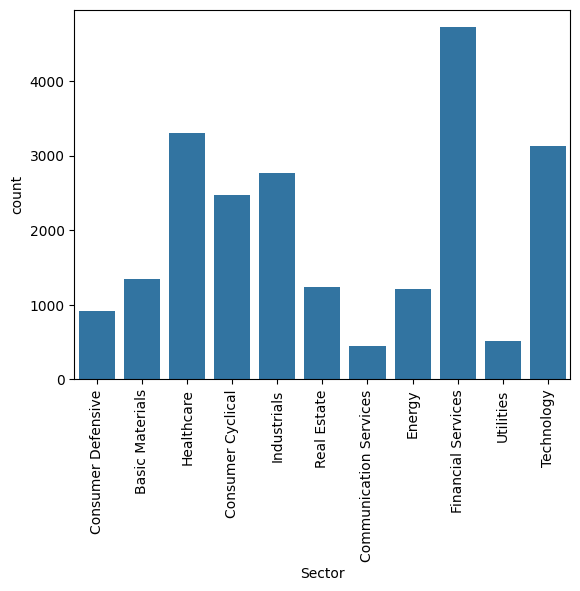

In [23]:
sns.countplot(data=df, x='Sector')
plt.xticks(rotation=90)
plt.show()

In [27]:
df_num=df.select_dtypes(include='number')

In [31]:
num_cols = df_num.select_dtypes(include=['number']).columns
binary_cols = [col for col in num_cols if df_num[col].nunique() == 2]
print("Binary columns:", binary_cols)

Binary columns: ['Class']


In [32]:
df_num_nb=df_num.drop(columns=binary_cols)

In [33]:
df_num_nb

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Following Year Price Variation [%]
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,...,0.08340,0.07510,-0.01870,-0.0217,0.03590,0.0316,0.12280,0.0000,-0.1746,-9.323276
1,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,0.23114,0.21756,0.06538,0.0459,0.11656,-0.0653,0.22288,1.6484,1.7313,-25.512193
2,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,...,0.12150,0.16330,0.06180,0.0981,0.18860,0.3268,0.27380,0.0000,0.0234,33.118297
3,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,...,0.00000,0.00000,0.02110,-0.0510,-0.01890,0.1963,-0.04580,0.0000,-0.0060,2.752291
4,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0.12500,0.11440,0.02570,0.0090,0.02150,0.0274,0.10250,0.0000,-0.0220,12.897715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22072,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,0.00000,0.00000,0.00000,0.0000,-0.05080,-0.1409,-0.01520,0.0000,-0.2602,-90.962099
22073,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,...,0.00000,0.00000,0.34450,0.0000,-0.23230,-0.8602,0.00000,0.0352,-0.0993,-77.922077
22074,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,-0.20000,0.00000,0.16050,0.7706,0.24890,0.4074,-0.09680,0.2415,0.8987,-17.834400
22075,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,-1.664769e+07,...,0.00000,0.00000,0.89800,0.0000,0.15680,-0.2200,0.00000,2.7499,0.1457,-73.520000


In [34]:
df_corr=df_num_nb.corr(method='spearman')

In [44]:
threshold = 0.8

# Absolute correlation matrix
corr_matrix = df_num_nb.corr(method='spearman').abs()

# Keep upper triangle only (to avoid duplicates)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Stack to long format and filter
high_corr_pairs = upper_tri.stack()
high_corr_pairs = high_corr_pairs[high_corr_pairs > threshold]

# Convert to DataFrame
high_corr_df = high_corr_pairs.reset_index()
high_corr_df.columns = ['Variable_1', 'Variable_2', 'Correlation']

print(high_corr_df)

               Variable_1                 Variable_2  Correlation
0                 Revenue            Cost of Revenue     0.829154
1                 Revenue               Gross Profit     0.947647
2                 Revenue               SG&A Expense     0.816930
3                 Revenue         Operating Expenses     0.868852
4                 Revenue                     EBITDA     0.829360
..                    ...                        ...          ...
204  Tangible Asset Value           Invested Capital     0.935364
205     Average Inventory  Days of Inventory on Hand     0.818703
206     Net Income Growth                 EPS Growth     0.815649
207     Net Income Growth         EPS Diluted Growth     0.812649
208            EPS Growth         EPS Diluted Growth     0.954230

[209 rows x 3 columns]


SPLIT DATASET INTO DEPVAR and INDEPVAR

In [62]:
df['Class']=df['Class'].astype(int)

In [63]:
df['Class'].value_counts()

Class
1    12159
0     9918
Name: count, dtype: int64

In [71]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split   

In [48]:
df.drop('Unnamed: 0', axis=1, inplace=True) #name can be dropped

In [ ]:
#SKF ensures that each fold has roughly the same proportiong of each class as the original dataset
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)

In [133]:
#Split Dep Var from Ind Vars
X = df.drop('Class', axis=1)   
y = df['Class'].copy()

In [ ]:
#Apply SKF to split into Train and Validation

#for train_index, val_index in skf.split(X,y): #Loops over each fold
 #   X_train, X_val= X.iloc[train_index], X.iloc[val_index]
  #  y_train, y_val = y.iloc[train_index], y.iloc[val_index] 

In [ ]:
# Apply dimensionality reduction techniques to numerical features
num_cols=X.select_dtypes(include='number').columns 

VARIANCE ANALYSIS

In [79]:
for train_index, val_index in skf.split(X,y): 
    X_train, X_val= X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index] 

    rows_var = []
    for i in num_cols:
        rows_var.append({'Feature':i, 'Variance':X_train[i].var()})
    
    df_var=pd.DataFrame(rows_var)

In [82]:
df_var.sort_values(by='Variance', ascending=True, inplace=True)

In [91]:
df_var.loc[df_var['Variance']<0.1]

,Feature,Variance
84,operatingProfitMargin,0.000000
145,Dividend Yield,0.022480
186,5Y Operating CF Growth (per Share),0.030105
188,5Y Net Income Growth (per Share),0.034661
190,5Y Shareholders Equity Growth (per Share),0.038231
184,5Y Revenue Growth (per Share),0.040147
149,Intangibles to Total Assets,0.041849
192,5Y Dividend per Share Growth (per Share),0.042591
193,3Y Dividend per Share Growth (per Share),0.059192
187,3Y Operating CF Growth (per Share),0.086081


OperatinPRofitMargin can be dropped, its constant

In [134]:
X=X.drop(['operatingProfitMargin'], axis=1)

In [135]:
X=X.drop(['Following Year Price Variation [%]'], axis=1) # Also drop the variable of price variation as if will ofc have the most impact. 
#It's like a view from the future

In [136]:
X = pd.get_dummies(X, drop_first=True)  # Convert categorical columns to dummies

In [122]:
X.dtypes.value_counts()

float64    202
bool        10
Name: count, dtype: int64

CORRELATION ANALYSIS

In [137]:
num_cols=X.select_dtypes(include='number')
df_corr = num_cols.corr(method='spearman').abs()

upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))
df_corr_pairs = upper.stack().reset_index()
df_corr_pairs.columns = ['Var1', 'Var2', 'Corr']

In [138]:
df_corr_pairs.loc[df_corr_pairs['Corr']>0.8].sort_values(by='Corr', ascending=False)  

,Var1,Var2,Corr
13749,returnOnCapitalEmployed,ROIC,1.000000
13003,ebitperRevenue,eBITperRevenue,1.000000
13527,returnOnAssets,Return on Tangible Assets,1.000000
15442,cashFlowToDebtRatio,cashFlowCoverageRatios,1.000000
15086,debtEquityRatio,Debt to Equity,1.000000
...,...,...,...
157,Revenue,Tangible Asset Value,0.801614
14952,debtRatio,totalDebtToCapitalization,0.801441
15280,totalDebtToCapitalization,Debt to Assets,0.801441
7036,Long-term investments,Investments,0.801331


In [139]:
X_train, X_val, y_train, y_val = train_test_split (X,y, test_size=0.2, stratify=y, random_state=99)

TREE BASED MODEL FOR FEATURE IMPORTANCE (RANDOM FOREST)

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
rf = RandomForestClassifier(random_state=99)
rf.fit(X_train, y_train) 
importances = pd.Series(rf.feature_importances_, index=X_train.columns)

In [146]:
top_features=importances.sort_values(ascending=False).head(100).index.tolist()

In [145]:
importances.sort_values(ascending=False)

Net Profit Margin                         0.010641
Effect of forex changes on cash           0.008116
Weighted Average Shares Diluted Growth    0.007713
Gross Profit Growth                       0.007441
Profit Margin                             0.007185
                                            ...   
Sector_Consumer Defensive                 0.000321
Sector_Healthcare                         0.000238
Sector_Utilities                          0.000227
Sector_Real Estate                        0.000217
Sector_Communication Services             0.000173
Length: 210, dtype: float64

In [147]:
X_train_top = X_train[top_features]
X_val_top = X_val[top_features]

2ND STEP, LETS TRY RFE TO REDUCE THE VARIABLES EVEN MORE

In [155]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

SCALING BEFORE FITTING TO lOGISTIC REGRESSION

In [156]:
scaler = MinMaxScaler()
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_val_top_scaled = scaler.transform(X_val_top) #Dont apply fit to prevent data leakage. Model only learns scaling paraments from training set

In [157]:
rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=30)
rfe.fit(X_train_top_scaled, y_train)
selected_features = X_train_top.columns[rfe.support_]

In [158]:
selected_features 

Index(['Effect of forex changes on cash', 'SG&A Expenses Growth',
       'Receivables Turnover', '5Y Revenue Growth (per Share)',
       '3Y Shareholders Equity Growth (per Share)',
       'Issuance (buybacks) of shares', 'eBITperRevenue',
       'Net cash flow / Change in cash', 'priceSalesRatio', 'SG&A to Revenue',
       'EV to Sales', '5Y Net Income Growth (per Share)',
       'EV to Free cash flow', 'Return on Tangible Assets',
       'Free Cash Flow Yield', 'returnOnAssets', 'ebitperRevenue',
       'Free Cash Flow', 'Retained earnings (deficit)',
       'Total non-current assets', 'Operating Cash Flow',
       '3Y Net Income Growth (per Share)', 'returnOnCapitalEmployed',
       'Tangible Book Value per Share', 'Investing Cash flow',
       'Book Value per Share', 'Gross Margin', 'priceToSalesRatio',
       'PFCF ratio', '5Y Operating CF Growth (per Share)'],
      dtype='object')

Statistical Analysis (Restart EDA with only the 30 most important variables)

In [ ]:
X = df[selected_features]
y = df['Class'].copy()

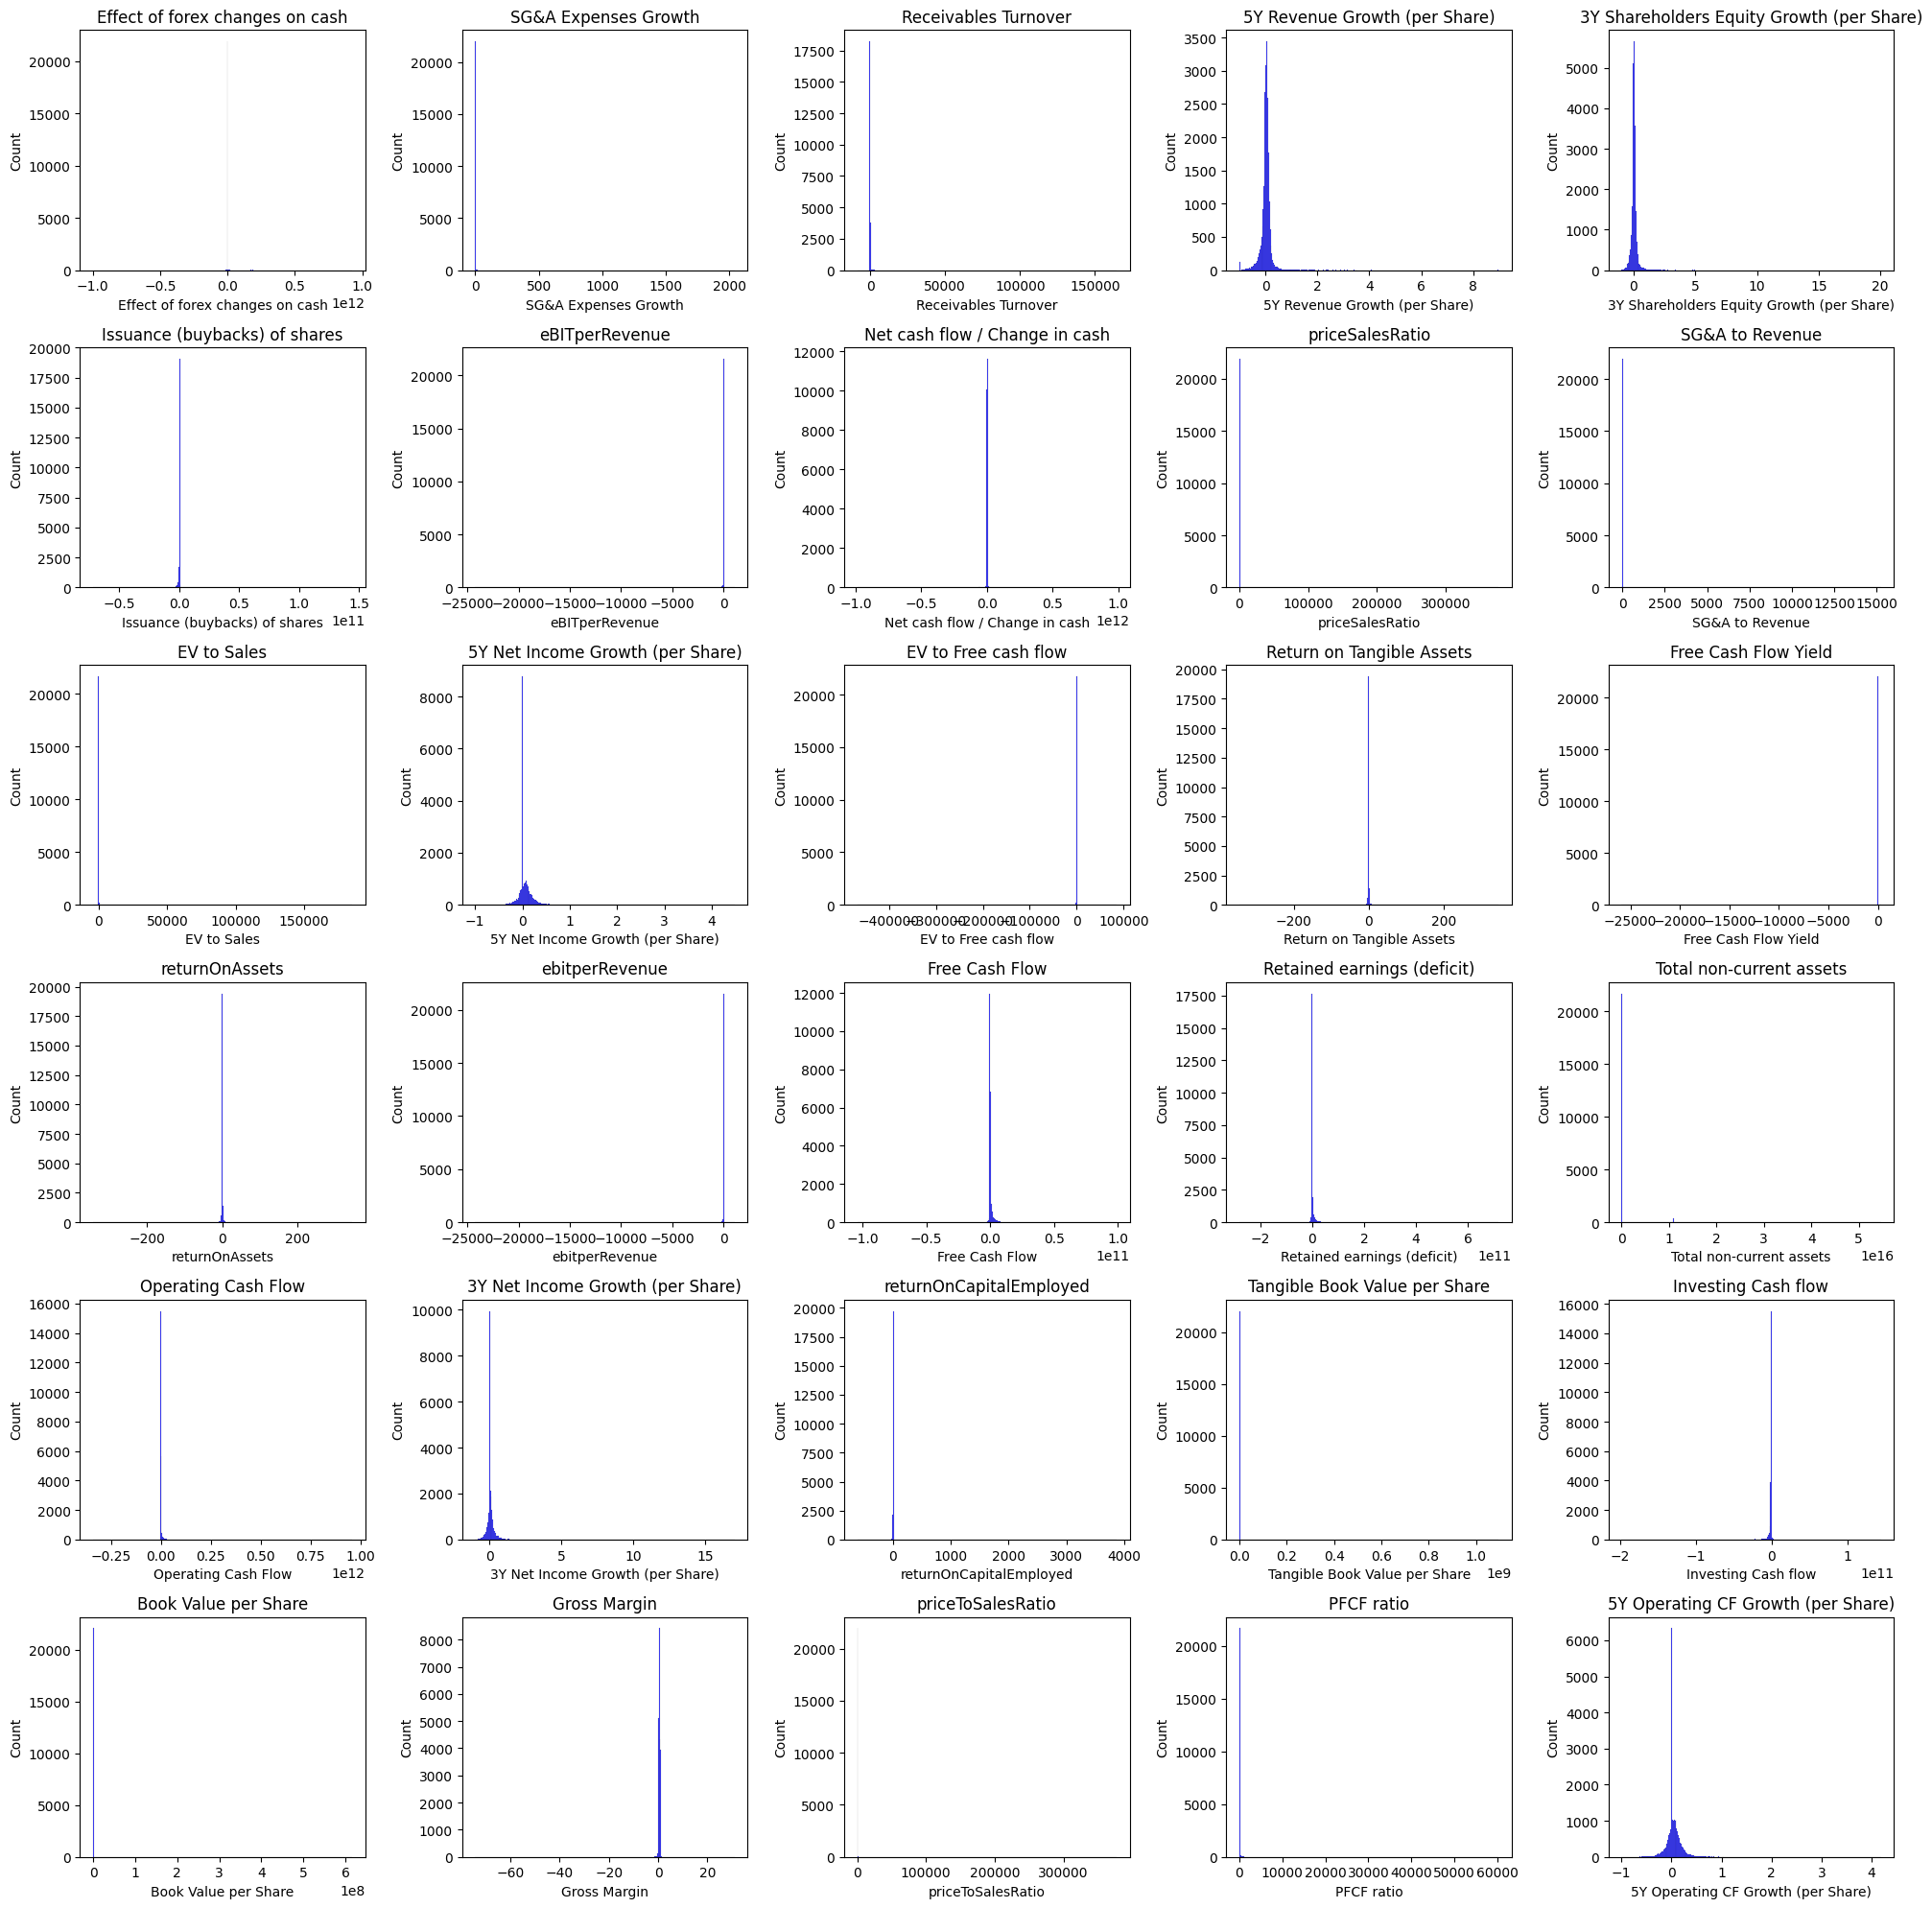

In [ ]:
fig,axes = plt.subplots (nrows=6, ncols=5, figsize=(20,20))
axes = axes.flatten()  # Flatten the 2D array to 1D

for i, col in enumerate(X.columns):
    sns.histplot(X[col], ax=axes[i], color='b')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [188]:
X_skew= X.select_dtypes(include='number').skew()
X_kurt= X.select_dtypes(include='number').kurt()

In [187]:
X_skew.sort_values(ascending=False)

SG&A Expenses Growth                         135.888693
Book Value per Share                         126.347716
Tangible Book Value per Share                121.919500
SG&A to Revenue                              108.293947
priceToSalesRatio                             90.191988
EV to Sales                                   90.110948
returnOnCapitalEmployed                       85.307049
Receivables Turnover                          78.358919
priceSalesRatio                               72.936989
PFCF ratio                                    72.465919
Operating Cash Flow                           41.762242
Issuance (buybacks) of shares                 28.761035
3Y Shareholders Equity Growth (per Share)     20.461928
Retained earnings (deficit)                   16.348239
3Y Net Income Growth (per Share)              14.004629
Free Cash Flow                                 9.648861
Total non-current assets                       8.814545
5Y Revenue Growth (per Share)                  4

In [189]:
X_kurt.sort_values(ascending=False)

SG&A Expenses Growth                         19444.234592
Free Cash Flow Yield                         19263.380193
Book Value per Share                         17238.690178
Tangible Book Value per Share                16326.409997
EV to Free cash flow                         14405.481848
SG&A to Revenue                              13520.034730
EV to Sales                                  10189.938144
returnOnCapitalEmployed                       9911.474026
priceToSalesRatio                             9117.652779
priceSalesRatio                               6869.348839
Receivables Turnover                          6801.654820
PFCF ratio                                    6086.662553
eBITperRevenue                                6025.965776
ebitperRevenue                                6025.965776
Issuance (buybacks) of shares                 3901.003788
Effect of forex changes on cash               3776.305749
Gross Margin                                  2952.631160
Operating Cash

In [190]:
def remove_outliers_iqr(df, factor=1.5):
    df_clean = df.copy()
    num_cols = df_clean.select_dtypes(include='number').columns
    for col in num_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        # Keep only rows within bounds
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

In [191]:
df_no_outliers = remove_outliers_iqr(X)

In [192]:
print (X.shape)
print (df_no_outliers.shape)

(22077, 30)
(585, 30)


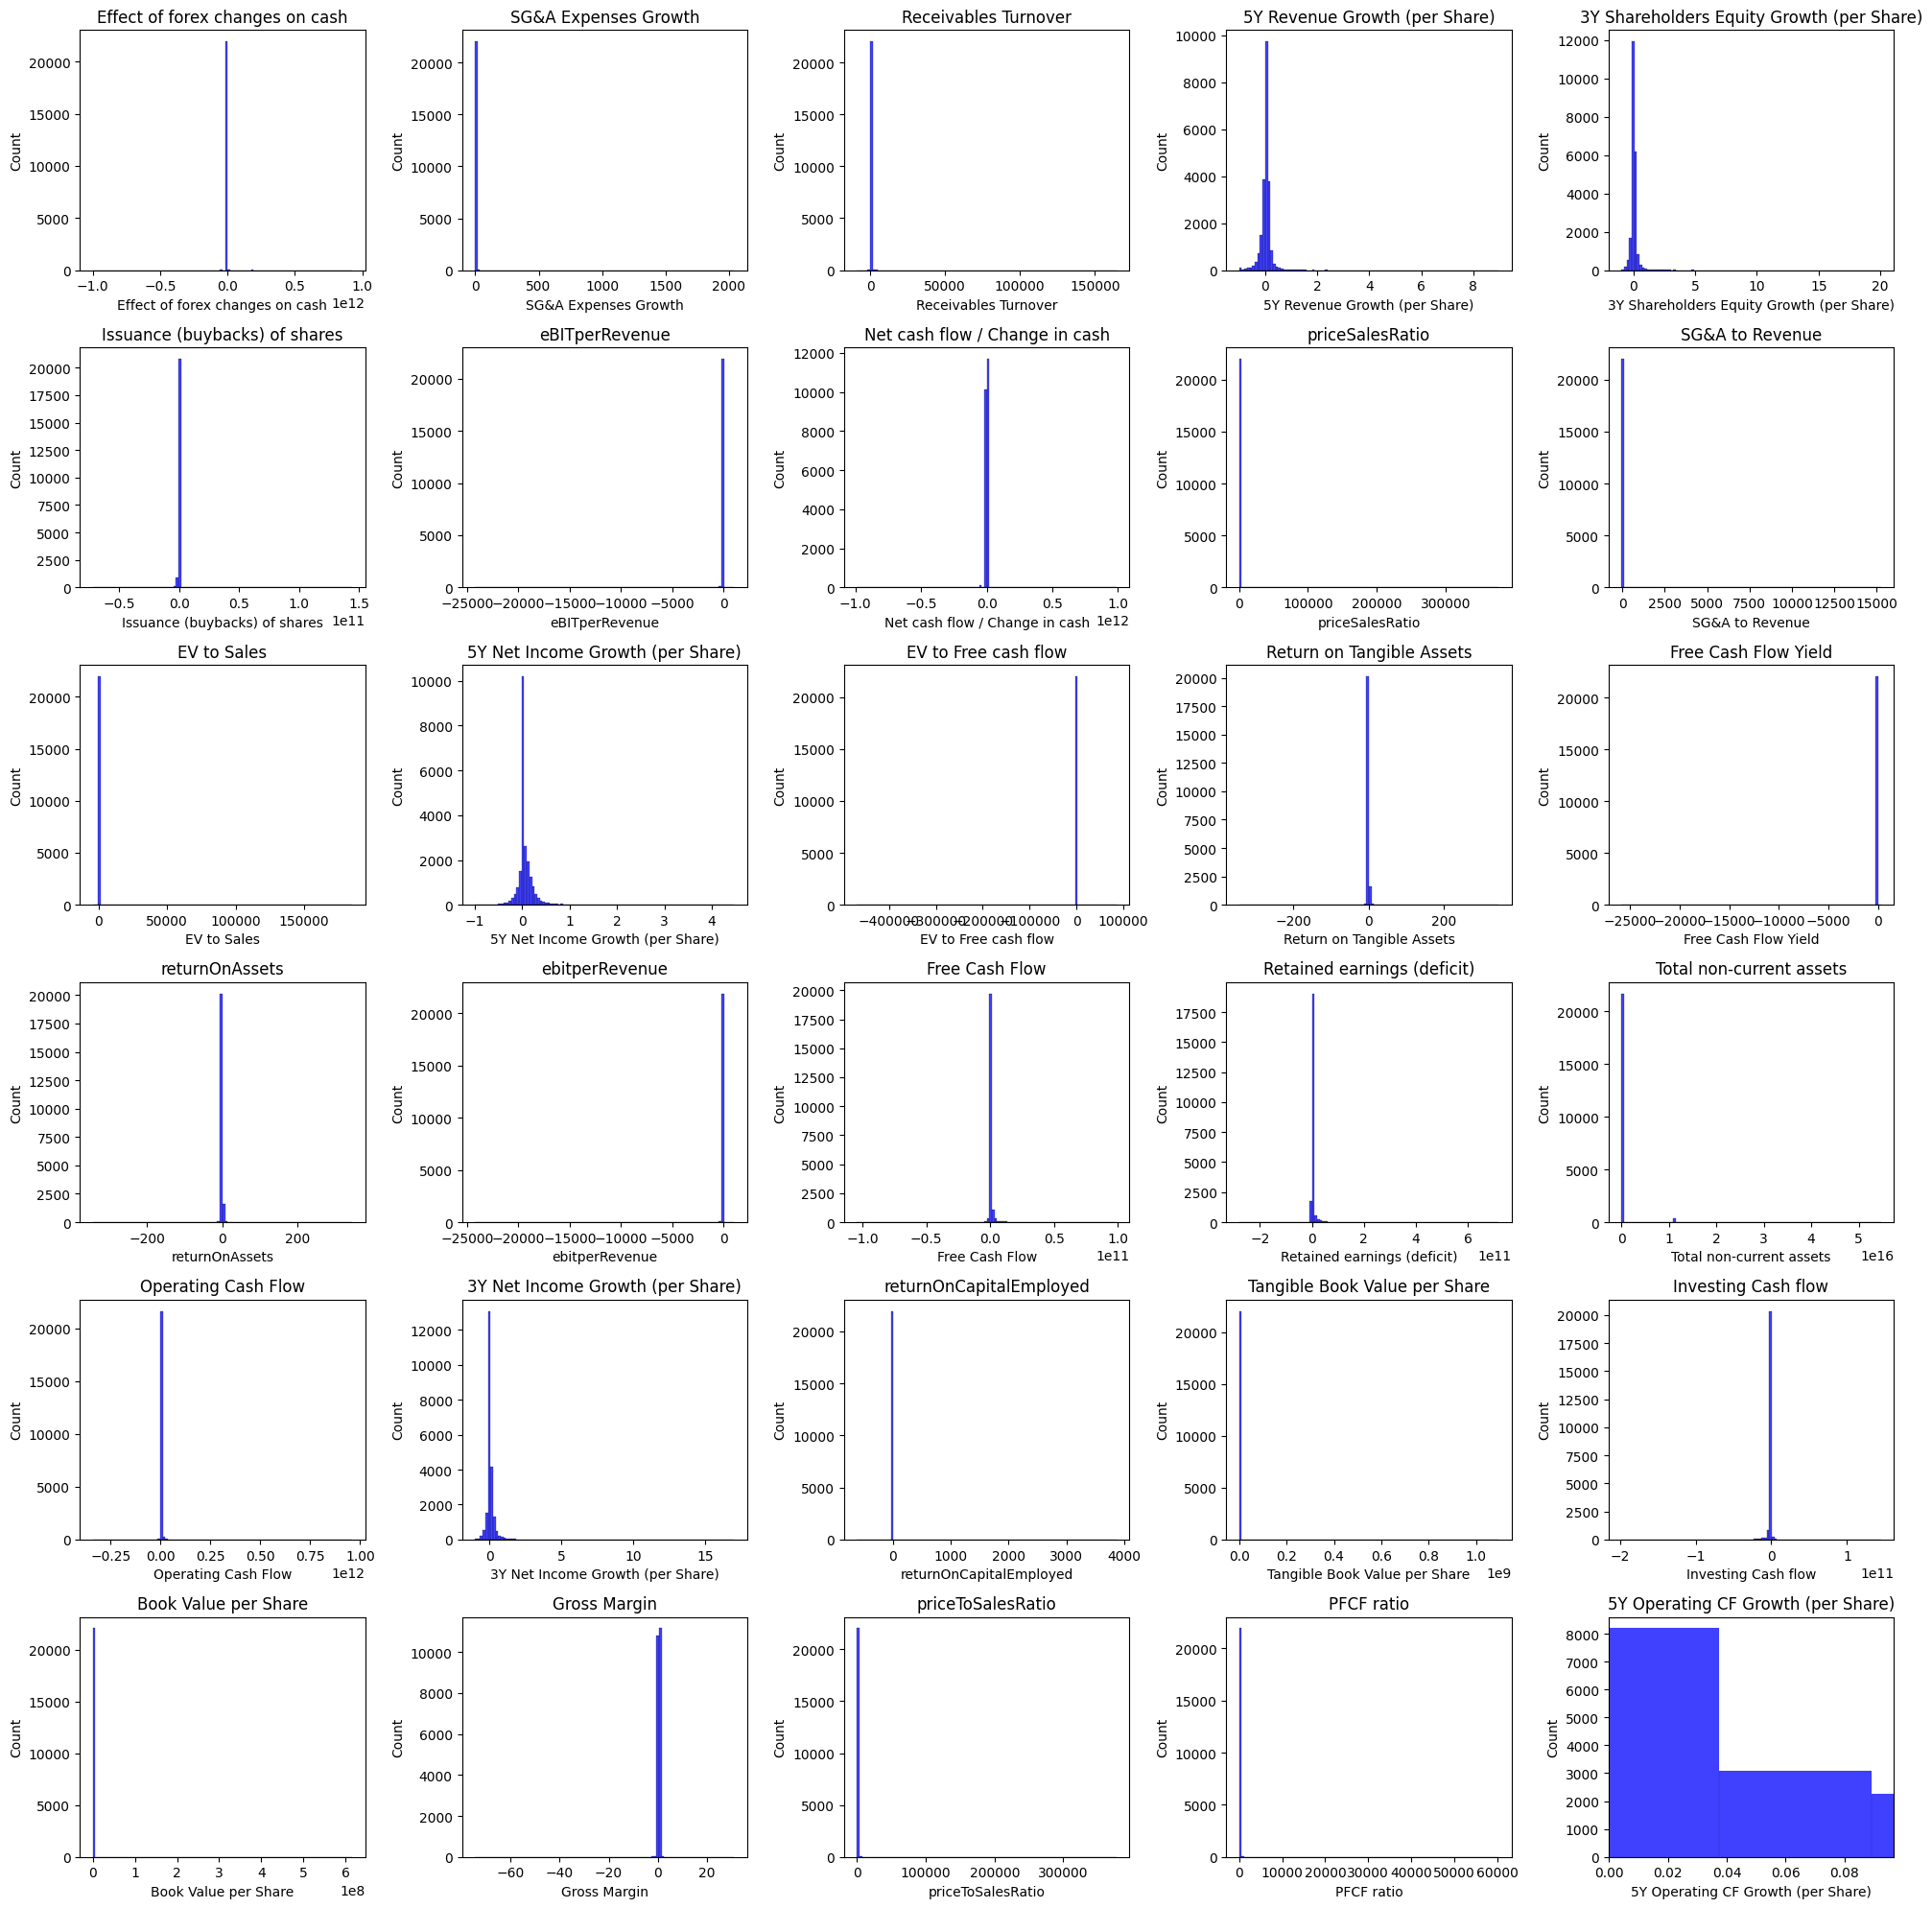

In [196]:
fig,axes = plt.subplots (nrows=6, ncols=5, figsize=(20,20))
axes = axes.flatten()  # Flatten the 2D array to 1D

for i, col in enumerate(X.columns):
    sns.histplot(X[col], ax=axes[i], bins=100, color='b')
    plt.xlim(X[col].quantile(0.25), X[col].quantile(0.75))
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

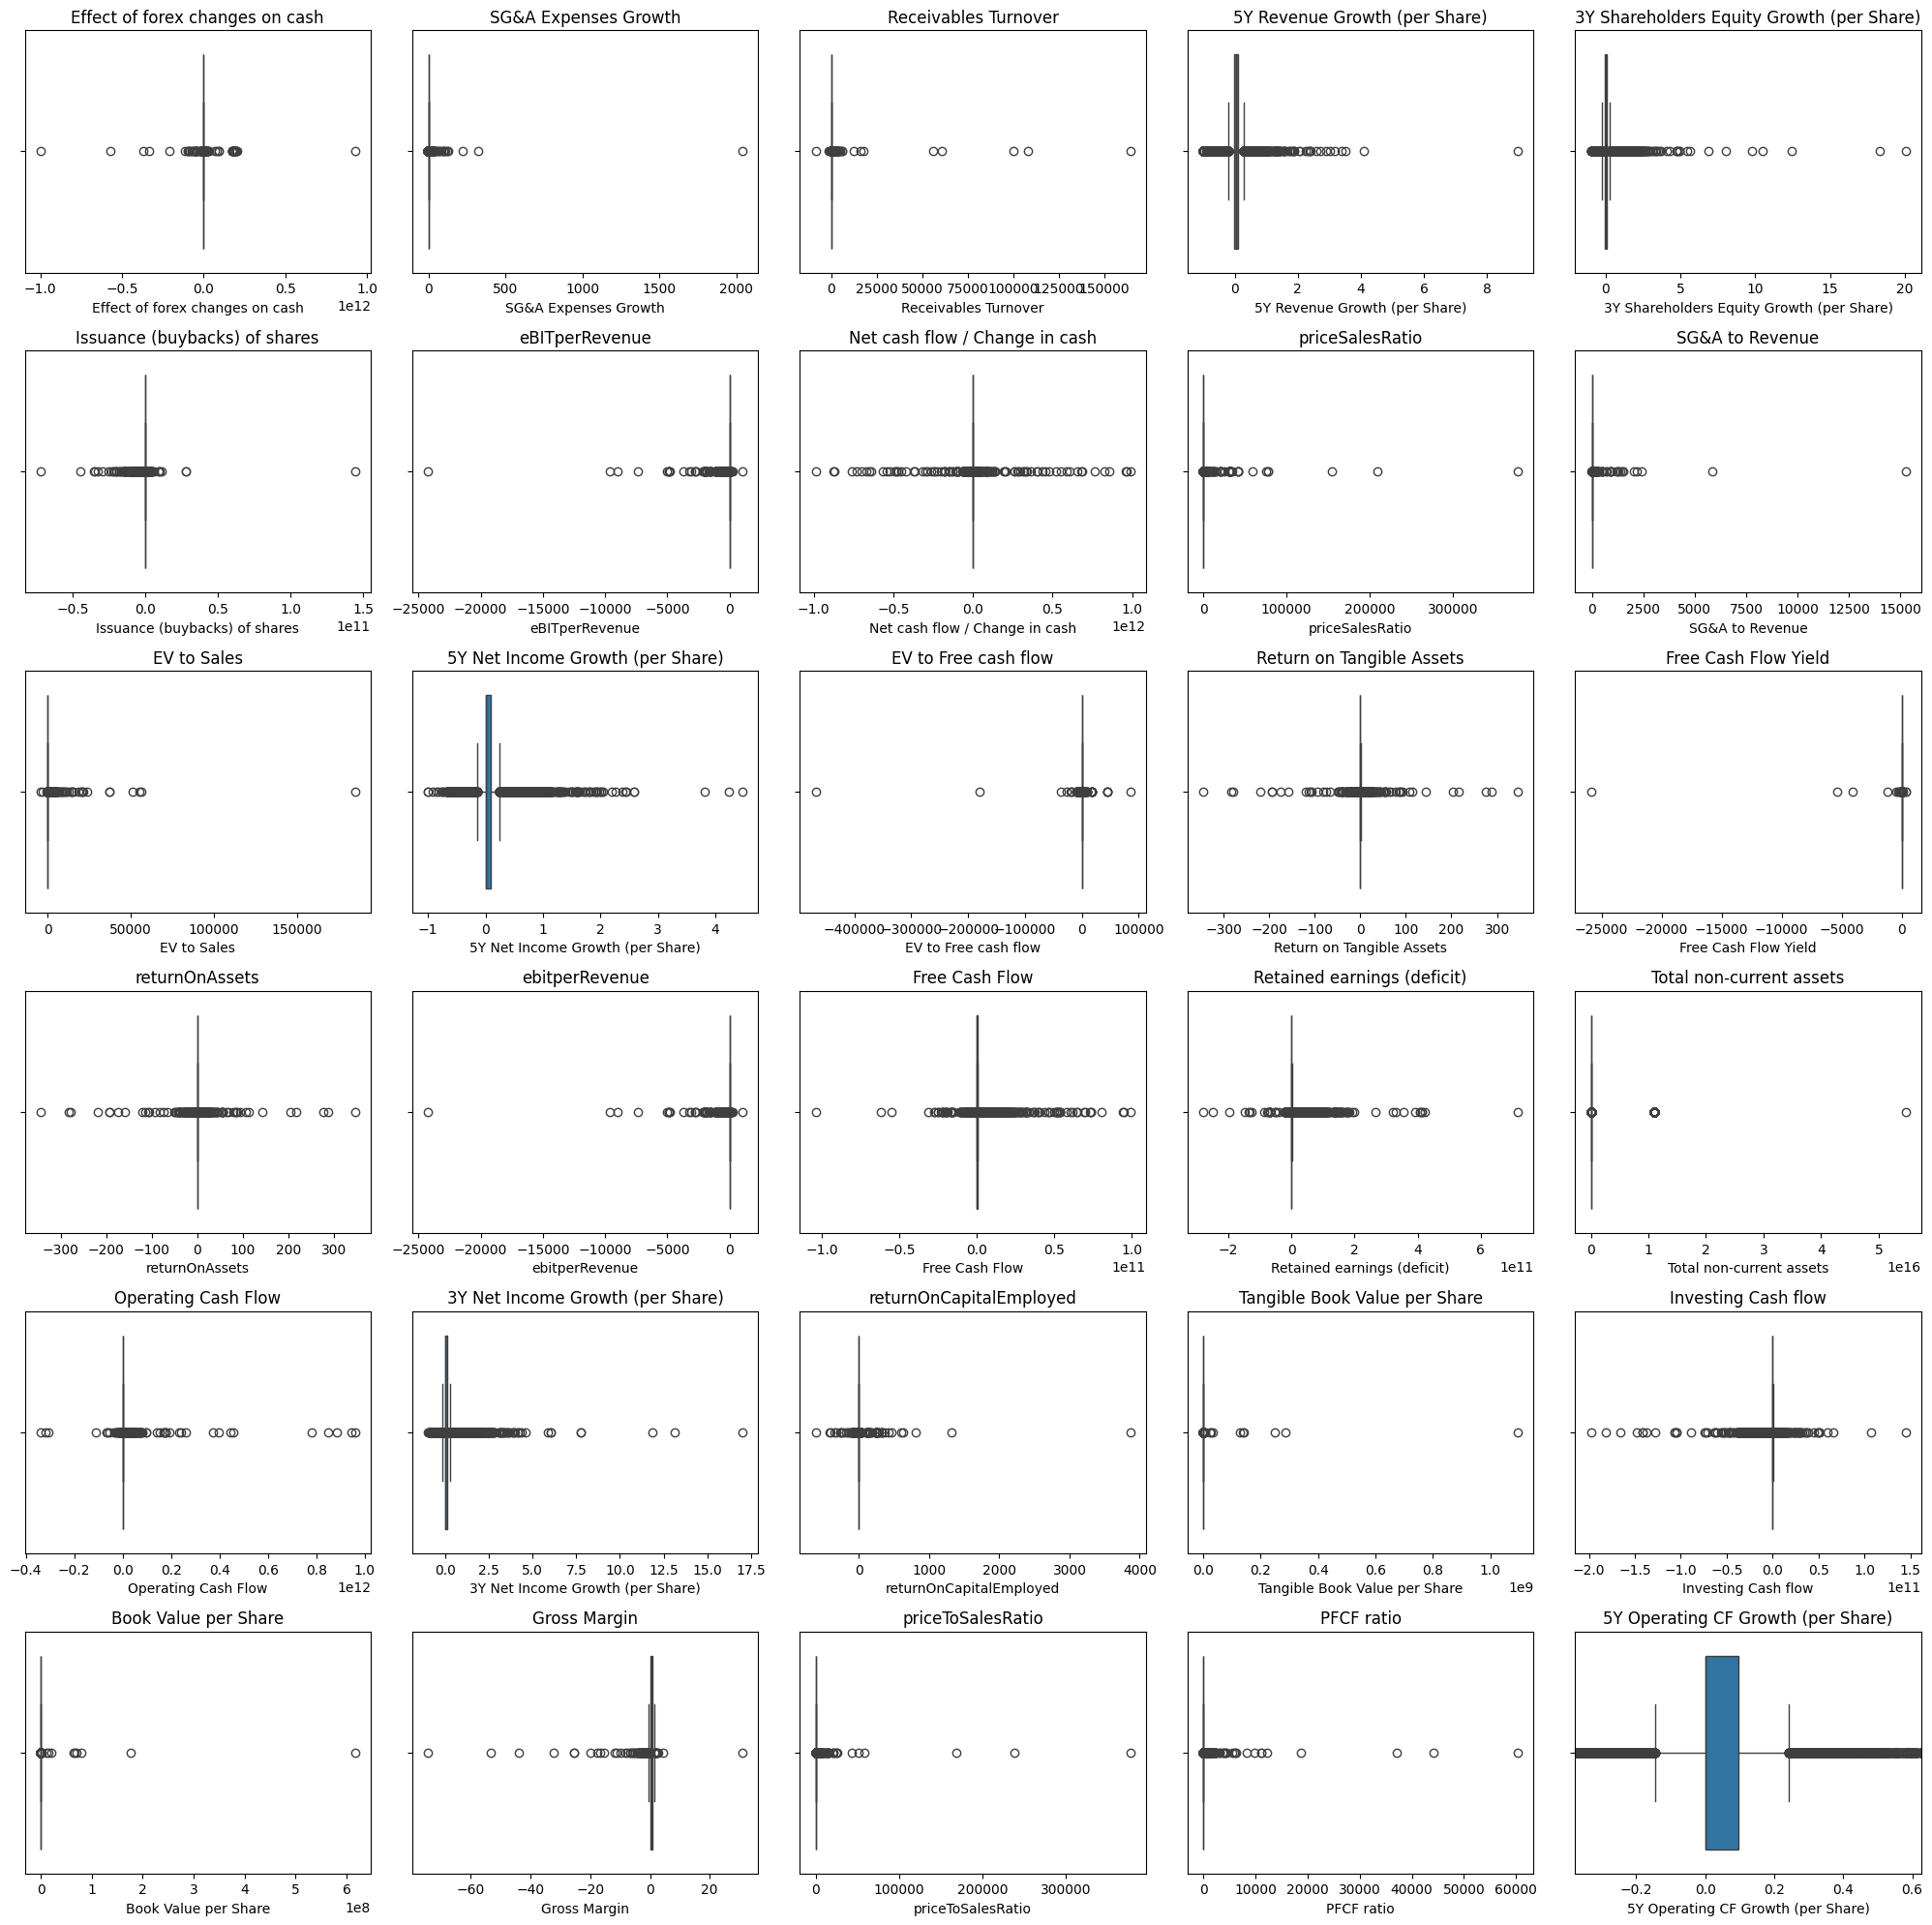

In [200]:
fig,axes = plt.subplots (nrows=6, ncols=5, figsize=(20,20))
axes = axes.flatten()  # Flatten the 2D array to 1D

for i, col in enumerate(X.columns):
    sns.boxplot(x=X[col], ax=axes[i])
    plt.xlim(X[col].quantile(0.01), X[col].quantile(0.99))
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [201]:
print(X['Total non-current assets'].describe())
print(X['Total non-current assets'].value_counts())

count    2.207700e+04
mean     1.980006e+14
std      1.494205e+15
min      0.000000e+00
25%      8.726100e+07
50%      7.756810e+08
75%      4.698700e+09
max      5.463812e+16
Name: Total non-current assets, dtype: float64
Total non-current assets
0.000000e+00    93
1.512000e+08    83
7.596139e+08    78
1.092762e+16    77
2.637906e+11    67
                ..
6.990387e+09     1
3.165600e+10     1
4.272100e+09     1
9.967000e+09     1
3.999400e+07     1
Name: count, Length: 19265, dtype: int64
